# Introduction

## Description of Attributes

Apple mobility data is collected through Apple Maps. The dataset features daily changes in requests for directions by transportation types: walking, driving, transit.

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import gdown
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [0]:
fpath = '/content/gdrive/Shared drives/covid19-risk/Revised_Mobility_Data/Apple_Mobility_LA.csv'
df = pd.read_csv(fpath)
df.set_index("date")

,driving,transit,walking
date,,,
2020-01-13,100.00,100.00,100.00
2020-01-14,105.93,103.78,105.72
2020-01-15,112.23,105.28,111.35
2020-01-16,111.73,103.12,111.68
2020-01-17,130.20,109.34,134.45
...,...,...,...
2020-05-24,74.80,27.74,81.16
2020-05-25,70.66,30.58,78.24
2020-05-26,82.46,35.85,84.20


In [0]:
df.isna().sum()

date       0
driving    2
transit    2
walking    2
dtype: int64

In [0]:
df = df.interpolate(method='values')
df.isna().sum()

date       0
driving    0
transit    0
walking    0
dtype: int64

In [0]:
data = pd.read_csv ('/content/gdrive/Shared drives/covid19-risk/major_policies.csv')   
ef = pd.DataFrame(data, columns= ['policy_date','policy'])
print (ef)

  policy_date                                             policy
0  2020-03-04                        state of emergency declared
1  2020-03-11                          gathering size 500 to 101
2  2020-03-16  gathering size 10 to 0, restaurants close, sch...
3  2020-03-19                                  shelter in place*
4  2020-03-20  public transit adjusts schedule for reduced pa...
5  2020-05-01                         beaches/state parks closed
6  2020-05-08  california enters stage 2: opening of low risk...


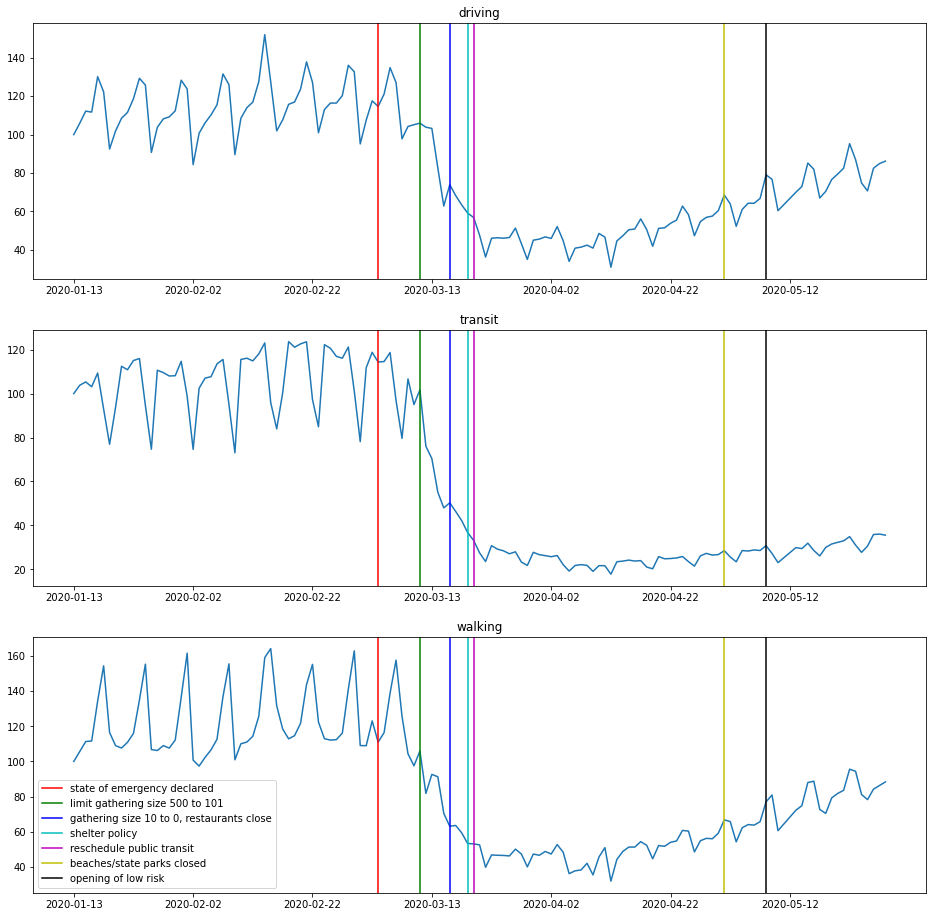

In [0]:
colors = ["red", "green", "blue", "c","m","y","k"]
labels = ["state of emergency declared","limit gathering size 500 to 101",
          "gathering size 10 to 0, restaurants close",
          "shelter policy",
          "reschedule public transit",
          "beaches/state parks closed",
          "opening of low risk"]

fig, axs = plt.subplots(3, 1,figsize=(16,16))
keys = df.keys()[1:]
for i,ax in enumerate(axs.flat):
    ax.plot(df["date"],df[keys[i]])
    ax.set_title(keys[i])
    ax.set_xticks(ax.get_xticks()[::20]) # show x-label every 20 samples
for i,policy in enumerate(ef['policy_date']):
    for ax in axs.flat:
        ax.axvline(policy, color = colors[i],label = labels[i])
plt.legend()